In [37]:
import pandas as pd
import numpy as np
from cherenkovdeconvolution import util

#p.set_printoptions(threshold=np.inf)
#df = pd.read_csv('sample.csv')
df=pd.read_csv('sample.csv', nrows=500000)
#print(df.head(8))
#X = df[['SplineMPEDirectHitsD.dir_track_length',
#'SPEFit2_HVFitParams.nmini'                       ,
#'LineFitGeoSplit2.zenith',
#   'SplineMPE.zenith'    ,
#     'SplineMPE.azimuth' 
#       'SPEFit2GeoSplit1BayesianFitParams.nmini',
#       'SPEFit2Bayesian.x',
#       'VariousVariables.Cone_Angle',
#       'SPEFit2TimeSplit1FitParams.logl',
#       'weight_honda_h4a']]
X = df[['SPEFit2Bayesian.x',
        'SPEFit2BayesianFitParams.nmini',
        'SPEFit2_HVFitParams.nmini',
        'SplineMPE.zenith',
        'SplineMPECharacteristicsIC.avg_dom_dist_q_tot_dom',
        'SplineMPEDirectHitsD.dir_track_length',
        'SplineMPEDirectHitsICB.n_early_strings',
        'SplineMPEDirectHitsICB.n_late_doms',
        'SplineMPEDirectHitsICD.n_dir_strings',
        'SplineMPEDirectHitsICE.n_late_strings',
        'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value']]

Y = df['MCPrimary.energy']
#'Dustyness.n_doms_in_dust','BestTrackDirectHitsICC.n_early_strings',
binning_E = np.logspace(np.log10(Y.min()-10),
np.log10(Y.max()+100), 13)    # creating 12 bins for the energy 



#Binning overflow & underflow manually
overflow = 1e10
bins_over = np.append(binning_E,overflow)
binning_E = bins_over

Y = np.digitize(Y, binning_E)  

Y = Y - 1

n_test = int(len(df)/10)

X_train = X.iloc[n_test:]#splitting the dataframe
Y_train = Y[n_test:]

X_test = X.iloc[:n_test]
Y_test = Y[:n_test]

f_true = util.fit_pdf(Y_test) 
f_true


array([2.5592e-01, 3.6756e-01, 2.1952e-01, 9.6880e-02, 3.8640e-02,
       1.4100e-02, 4.6800e-03, 1.6600e-03, 6.8000e-04, 2.4000e-04,
       8.0000e-05, 4.0000e-05])

In [38]:
from mord import LogisticSE
from cherenkovdeconvolution import dsea
f_ord=dsea(X_test, X_train, Y_train,LogisticSE(alpha=1.), K = 3)
f_ord

array([3.22372830e-03, 5.40486074e-02, 2.89053493e-01, 4.10241902e-01,
       1.85492345e-01, 4.69863009e-02, 8.98352266e-03, 1.68675278e-03,
       2.02501171e-04, 5.75669401e-05, 2.23612490e-05, 9.18274402e-07])

In [39]:
from cherenkovdeconvolution import dsea
from sklearn.linear_model import LogisticRegression

f_multi = dsea(X_test, X_train, Y_train,LogisticRegression(multi_class='multinomial',max_iter=100000), K=3)#doesnt work with the default solver?

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [40]:
from cherenkovdeconvolution import dsea
from sklearn.linear_model import LogisticRegression

f_multi2 = dsea(X_test, X_train, Y_train,LogisticRegression(solver='saga',multi_class='multinomial',max_iter=10000), K=3)
f_multi2

array([0.04861655, 0.0698211 , 0.08373528, 0.09095279, 0.09557769,
       0.0964889 , 0.09670598, 0.09351049, 0.08799714, 0.07809829,
       0.08581873, 0.07267705])

In [41]:
from cherenkovdeconvolution import dsea
from sklearn.tree import ExtraTreeClassifier

f_extra = dsea(X_test, X_train, Y_train, ExtraTreeClassifier(), K=3) 

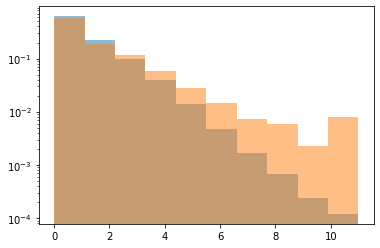

In [43]:
#plotting Multinomial Logistic Regression against f_true
from matplotlib import pyplot as plt
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_multi, alpha = 0.5,label='f_multi')
plt.yscale('log')
plt.show()

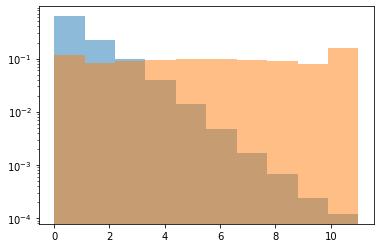

In [44]:
#plotting Multinomial Logistic Regression with the saga solver against f_true
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_multi2, alpha = 0.5,label='f_saga')
plt.yscale('log')
plt.show()

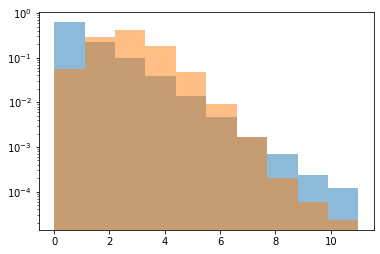

In [45]:
#plotting LogisticSE against f_true
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_ord, alpha = 0.5,label='f_ord')
plt.yscale('log')
plt.show()

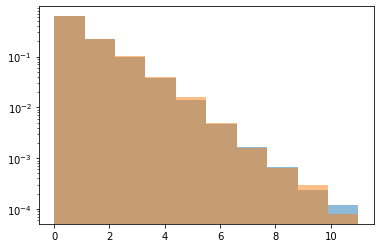

In [46]:
#plotting Extra Tree Classifier against f_true
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_extra, alpha = 0.5,label='f_extra')
plt.yscale('log')
plt.show()